<a href="https://colab.research.google.com/github/mayurrajbharati/Sparks-Intern-Tasks/blob/main/Task%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1: Exploring Supervised Machine Learning**


We are provided with a small dataset of 25 records and we are to study the relationship between the number of hours a student studies vs the percentage of marks he/she gets and finally predict the marks of a student if he/she studies for 9.25 hours in a day.

**Step 1: Importing essential libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Step 2: Loading data**

In [39]:
df = pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Step 3: Data Wrangling**

In [40]:
#Statistical information of data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [41]:
#check if there is any null value

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Since there are no NaN records as well as Null records and only 2 columns (one feature and one target), so no need for any Data Wrangling.

**Step 4: Visualization**

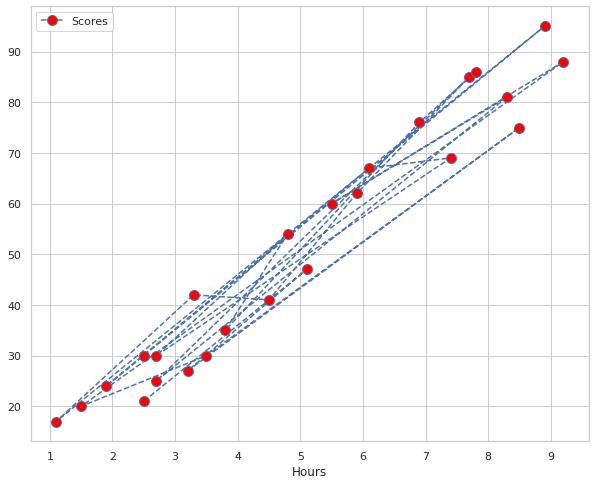

In [42]:
df.plot("Hours","Scores", linestyle ="--",marker ="o", markersize = "10", markerfacecolor = "red", figsize = (10,8))

So, from the above graph we can say that as the number of study hours increase, the grades also get better for this dataset. Hence there is a positive linear relationship between Hours studied and score achieved. So we can directly apply linear regression.

**Step 5: Splitting into Training and Test Sets**

In [43]:
X = df.iloc[:, :-1].values  
Y = df.iloc[:, 1].values

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state=0)

**Step 6: Fitting simple linear regressor**


In [45]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("Training Complete!")

Training Complete!


Next, we find the intercept and slope value of the regression line and plot the regression line.

In [58]:
slope = regressor.coef_
intercept = regressor.intercept_

print("Slope is :", slope)
print("Intercept is ",intercept)

Slope is : [9.91065648]
Intercept is  2.018160041434662


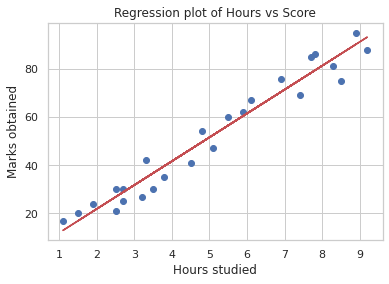

In [50]:
line = slope*X + intercept

plt.scatter(X,Y)
plt.plot(X,line, 'r')
plt.xlabel('Hours studied')
plt.ylabel('Marks obtained')
plt.title('Regression plot of Hours vs Score')
plt.show()

**Step 7: Predicting the test set results**

In [51]:
Y_pred = regressor.predict(X_test)

In [53]:
data = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Step 8: Predicting the score for 9.25 hours**

In [61]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No. of hours studied = ",hours)
print("Predicted Score(out of 100) = ", own_pred[0])

No. of hours studied =  9.25
Predicted Score(out of 100) =  93.69173248737539


So, we can say that if a student studies for 9.25 hours a day, he/she will score 93.7 percentage of marks.

**Step 9: Evaluating the Model**

In [62]:
from sklearn import metrics
from sklearn.metrics import r2_score


In [63]:
print('Mean Absolute Error :', metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error : 4.183859899002982


In [65]:
print('Root Mean Square Error :', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Root Mean Square Error : 4.647447612100373


In [66]:
print('Accuracy: ', r2_score(Y_test, Y_pred))

Accuracy:  0.9454906892105354


**Conclusion:** I have applied a simple linear regressor to a rather small dataset of 25 records to study the relationship between hours studied and scores obtained. I have found out that if a student studies for 9.25 hours, the score will be approximately 93.7, however this is not always true as the dataset is extremely small. Upon Model Evaluation, I found out that the MAE is 4.67 and the RMSE is 4.64. Further, I got an accuray of 94.5%.